# Part A: Classification Problem

## Imports

In [34]:
import tensorflow
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import os
if not os.path.isdir('output_1a'):
    os.makedirs('output_1a')

## Globals

In [19]:
histories = {}
times = {}

## Read Data

In [3]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

## Q1

Divide the dataset into a 70:30 ratio for training and testing. Use appropriate scaling of input features. We solely assume that there are only two datasets here: training & test.

In [5]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # divide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [6]:
X_train, Y_train, X_test, Y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


Design a feedforward deep neural network (DNN) which consists of an input layer, one hidden layer of 16 neurons with ReLU activation function, and an output softmax layer. 
Use an stochastic gradient descent with ‘adam’ optimizer with default parameters, and batch size = 1. Apply dropout of probability 0.3 to the hidden layer.

a) Use the training dataset to train the model for 50 epochs. Note: Use 50 
epochs for subsequent experiments.

In [23]:
#hidden layer parameters
num_neurons = 16
hidden_activation = 'relu'
dropout_prob = 0.3

#output layer parameters
num_genres = 10
output_activation = 'softmax'

num_epochs = 50
batch_size = 1

#create model
model = keras.Sequential()
#hidden layer
model.add(keras.layers.Dense(num_neurons, activation = hidden_activation))
#dropout
model.add(keras.layers.Dropout(dropout_prob))
#output layer
model.add(keras.layers.Dense(num_genres, activation = output_activation))

#compile and fit
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer = 'adam', 
              metrics =  ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=False)])

histories['1a'] = model.fit(X_train, Y_train, 
                        epochs=num_epochs, 
                        batch_size = batch_size, 
                        verbose = 1,
                        validation_data=(X_test,Y_test))


Epoch 1/50
700/700 [==============================] - 1s 769us/step - loss: 2.1637 - accuracy: 0.2214 - sparse_categorical_crossentropy: 2.1637 - val_loss: 1.7984 - val_accuracy: 0.3433 - val_sparse_categorical_crossentropy: 1.7984
Epoch 2/50
700/700 [==============================] - 1s 731us/step - loss: 1.6909 - accuracy: 0.3643 - sparse_categorical_crossentropy: 1.6909 - val_loss: 1.5664 - val_accuracy: 0.4133 - val_sparse_categorical_crossentropy: 1.5664
Epoch 3/50
700/700 [==============================] - 1s 776us/step - loss: 1.5390 - accuracy: 0.4486 - sparse_categorical_crossentropy: 1.5390 - val_loss: 1.4286 - val_accuracy: 0.5067 - val_sparse_categorical_crossentropy: 1.4286
Epoch 4/50
700/700 [==============================] - 0s 682us/step - loss: 1.3891 - accuracy: 0.4786 - sparse_categorical_crossentropy: 1.3891 - val_loss: 1.3472 - val_accuracy: 0.5367 - val_sparse_categorical_crossentropy: 1.3472
Epoch 5/50
700/700 [==============================] - 1s 873us/step - lo

700/700 [==============================] - 0s 671us/step - loss: 0.7679 - accuracy: 0.6957 - sparse_categorical_crossentropy: 0.7679 - val_loss: 1.1338 - val_accuracy: 0.6133 - val_sparse_categorical_crossentropy: 1.1338
Epoch 37/50
700/700 [==============================] - 0s 662us/step - loss: 0.7740 - accuracy: 0.6986 - sparse_categorical_crossentropy: 0.7740 - val_loss: 1.1622 - val_accuracy: 0.6167 - val_sparse_categorical_crossentropy: 1.1622
Epoch 38/50
700/700 [==============================] - 0s 652us/step - loss: 0.7573 - accuracy: 0.7243 - sparse_categorical_crossentropy: 0.7573 - val_loss: 1.1225 - val_accuracy: 0.6300 - val_sparse_categorical_crossentropy: 1.1225
Epoch 39/50
700/700 [==============================] - 0s 681us/step - loss: 0.6924 - accuracy: 0.7529 - sparse_categorical_crossentropy: 0.6924 - val_loss: 1.1645 - val_accuracy: 0.6367 - val_sparse_categorical_crossentropy: 1.1645
Epoch 40/50
700/700 [==============================] - 1s 723us/step - loss: 0.7

b) Plot accuracies on training and test data against training epochs and 
comment on the plots.

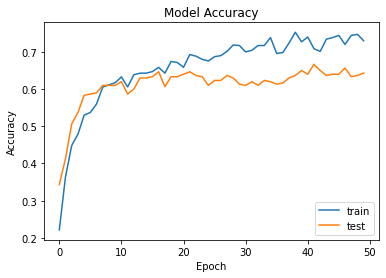

In [24]:
#Plot graphs for accuracy and errors
plt.plot(histories['1a'].history['accuracy'])
plt.plot(histories['1a'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'lower right' )
plt.savefig('./output_1a/1a_acc.png')
plt.show()

We are unable to tell exactly if the saturation point has been attained due to the graph being jagged. However, we can tell that the accuracy starts to overfit at about 10 epochs as the training accuracy is higher than the test accuracy and the difference between them increases with the epochs. The test accuracy converges faster and earlier than the training accuracy. The graph being jagged also hints that the learning rate might be too high.

c) Plot the losses on training and test data against training epochs. State the 
approximate number of epochs where the test error begins to converge.

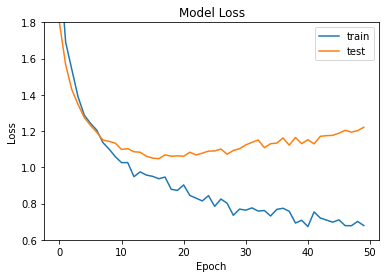

In [25]:
plt.plot(histories['1a'].history['loss'])
plt.plot(histories['1a'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.savefig('./output_1a/1a_loss.png')
plt.ylim(0.6,1.8)
plt.savefig('./output_1a/1a_loss_minimum.png')
plt.show()

The test error begins to converge at around 18 epochs.

## Q2

In this question, we will compare the performance of the model using stochastic gradient 
descent and mini-batch gradient descent, as well as determining the optimal batch size 
for mini-batch gradient descent. Find the optimal batch size for mini-batch gradient 
descent by training the neural network and evaluating the performances for different 
batch sizes. Note: Use 3-fold cross-validation on training partition to perform parameter 
selection.

In [79]:
#functions to create and fit model - to facilitate changing of batch sizes
def model_create(num_neurons, hidden_activation, num_genres, 
                 output_activation):
    model = keras.Sequential()
    #hidden layer
    model.add(keras.layers.Dense(num_neurons, activation = hidden_activation))
    #dropout
    model.add(keras.layers.Dropout(0.3))
    #output layer
    model.add(keras.layers.Dense(num_genres, activation = output_activation))

    #compile and fit
    model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                  optimizer = 'adam',
                  metrics =  ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=False)])

    return model

def model_fit(X_train, Y_train, X_test, Y_test, model, epochs, batch_size, callbacks):
    history = model.fit(X_train, Y_train, 
                        epochs=epochs, 
                        batch_size = batch_size, 
                        verbose = 0,
                        callbacks = callbacks,
                        validation_data=(X_test,Y_test))
               
    return history

In [37]:
#callback to get time taken to train
class TimeCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

a) Plot mean cross-validation accuracies over the training epochs for different
batch sizes. Limit search space to batch sizes {1,4,8,16,32, 64}.

In [80]:
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)
k_fold = KFold(n_splits = 3, random_state = seed, shuffle = True)
k_fold.get_n_splits(X_train)
batch_sizes = [1, 4, 8, 16, 32, 64]

for batch_size in batch_sizes:
    for i, (train_fold_i, test_fold_i) in enumerate(k_fold.split(X_train)):
        X_train_fold = X_train[train_fold_i]
        X_test_fold = X_train[test_fold_i]
        Y_train_fold = Y_train[train_fold_i]
        Y_test_fold = Y_train[test_fold_i]
               
        model = model_create(num_neurons, hidden_activation, num_genres,
                             output_activation)
            
        model_name = "batch_size_" + str(batch_size) + "_fold_" + str(i+1)
        callbacks = TimeCallback()
               
        histories[model_name] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, batch_size, callbacks)
               
        times[model_name] = callbacks.times
    

batch_size_1_fold_1


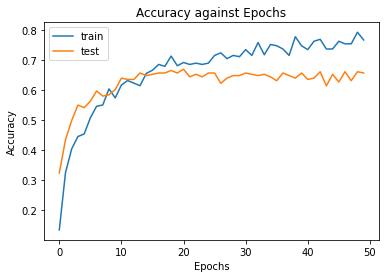

batch_size_1_fold_2


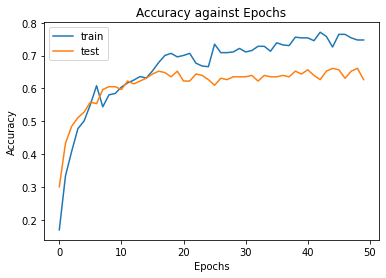

batch_size_1_fold_3


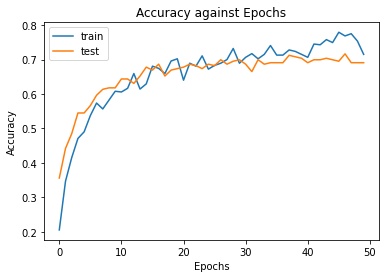

batch_size_4_fold_1


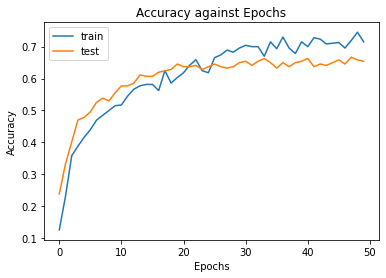

batch_size_4_fold_2


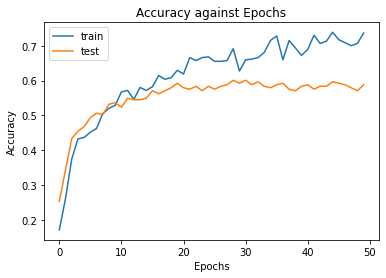

batch_size_4_fold_3


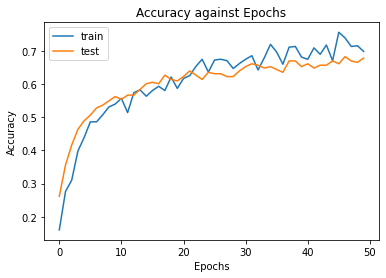

batch_size_8_fold_1


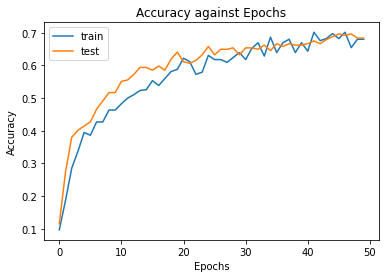

batch_size_8_fold_2


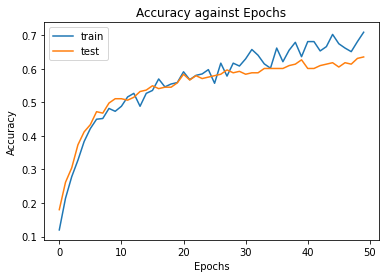

batch_size_8_fold_3


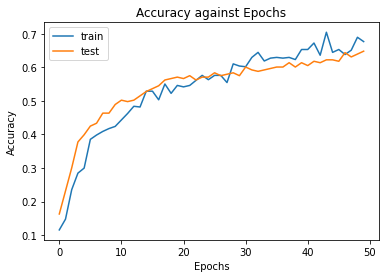

batch_size_16_fold_1


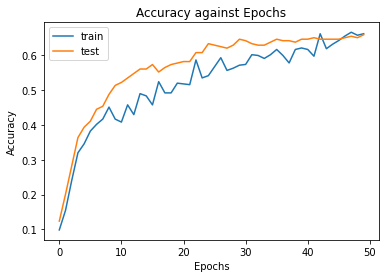

batch_size_16_fold_2


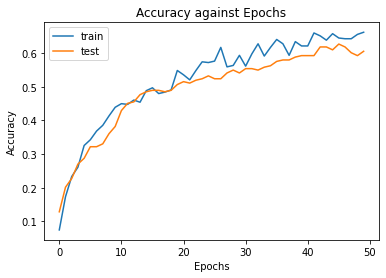

batch_size_16_fold_3


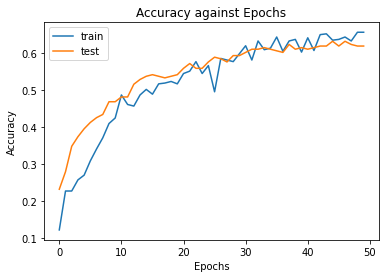

batch_size_32_fold_1


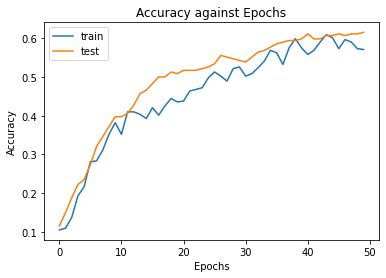

batch_size_32_fold_2


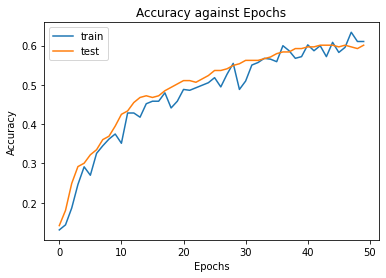

batch_size_32_fold_3


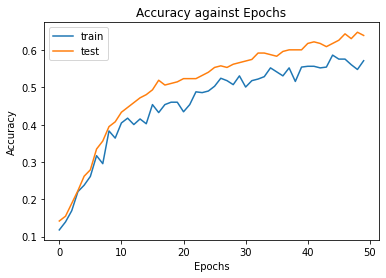

batch_size_64_fold_1


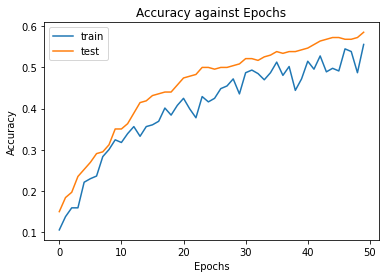

batch_size_64_fold_2


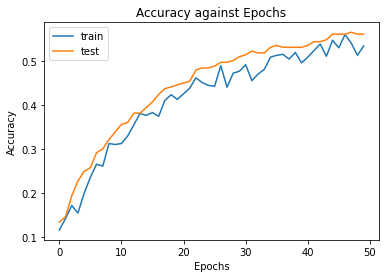

batch_size_64_fold_3


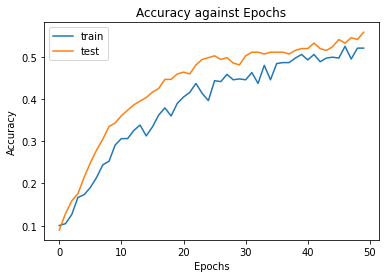

In [81]:
#plot model accuracy
for batch_size in batch_sizes:
    for i in range(3):
        model_name = "batch_size_" + str(batch_size) + "_fold_" + str(i+1)
        print(model_name)
        plt.plot(histories[model_name].history['accuracy'])
        plt.plot(histories[model_name].history['val_accuracy'])
        plt.title('Accuracy against Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train','test'])
        plt.savefig('./output_1a/2a_'+ model_name + '_accuracy.png')
        plt.show()

b) Create a table of median time taken to train the network for one epoch 
against different batch sizes.
(Hint: Introduce a callback)

In [82]:
median_data = []
for batch_size in batch_sizes:
    total_batch_time = 0
    for i in range(3):
        batch_size_times = times['batch_size_' + str(batch_size) + '_fold_' + str(i+1)]
        total_batch_time += np.sum(batch_size_times)
    median_data.append([batch_size, np.median(total_batch_time)])

pd.DataFrame(median_data, columns=["Batch Size", "Median"])        

,Batch Size,Median
0,1,43.190940
1,4,16.017463
2,8,10.452051
3,16,6.940446
4,32,5.143569
5,64,4.286928


c) Select the optimal batch size and state reasons for your selection.

We generate the average accuracy and loss to find out the optimal batch size.

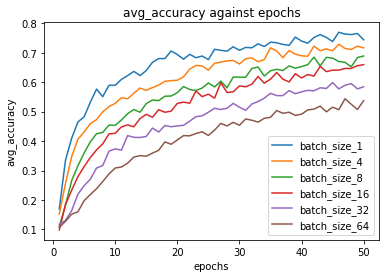

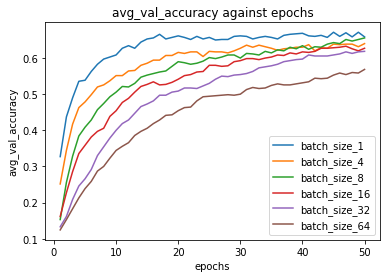

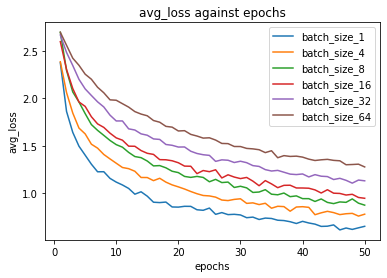

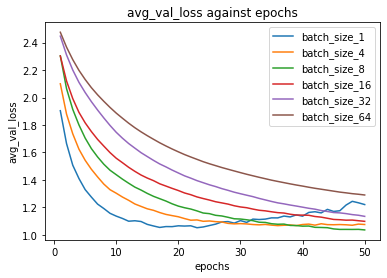

In [83]:
avg_accuracy = []
avg_val_accuracy = []
avg_loss = []
avg_val_loss = []

for batch_size in batch_sizes:
    batch_accuracy = []
    batch_val_accuracy = []
    batch_loss = []
    batch_val_loss = []
    for i in range(3):
        history = histories['batch_size_' + str(batch_size) + '_fold_' + str(i+1)]

        batch_accuracy.append(np.array(history.history['accuracy']))
        batch_val_accuracy.append(np.array(history.history['val_accuracy']))
        batch_loss.append(np.array(history.history['loss']))
        batch_val_loss.append(np.array(history.history['val_loss']))
        
    avg_accuracy.append(np.mean(batch_accuracy, axis=0))
    avg_val_accuracy.append(np.mean(batch_val_accuracy, axis=0))
    avg_loss.append(np.mean(batch_loss, axis=0))
    avg_val_loss.append(np.mean(batch_val_loss, axis=0))
    
#plotting it out
performance_metrics = [avg_accuracy, avg_val_accuracy,avg_loss, avg_val_loss]
performance_metrics_name = ['avg_accuracy', 'avg_val_accuracy','avg_loss', 'avg_val_loss']

for i, performance_metric in enumerate(performance_metrics):
    name = performance_metrics_name[i]
    
    for j in range(len(batch_sizes)):
        plt.plot(np.arange(1, num_epochs+1), performance_metric[j], label='batch_size_'+ str(batch_sizes[j]))
        plt.title(name + " against epochs")
        plt.ylabel(name)
        plt.xlabel("epochs")
        plt.legend()
    plt.savefig('./output_1a/2a_'+ name + ' against epochs.png')
    plt.show()

Batch size 1 performs well at the start but diverges afterwards. Batch size 4 seems to be the optimal batch size as its average accuracy and average val accuracy are higher than the rest and it also has the lowest average losses (within the 50 epochs).

Hence we take batch size 4 to be the optimal batch size.

d) What is the difference between mini-batch gradient descent and stochastic 
gradient descent and what does this mean for model training?

Stochastic Gradient Descent (SGD) uses the whole training data and at each step, it chooses a random instance of the training data, then computes the gradient based on that chosen instance. Mini-batch Gradient Descent computes the gradient based on the full training set by performing the computing at every step (for a small batch). For model training, SGD is faster as it involves lesser data in the computation. However, Mini-batch GD may be better as it computes based on the full training set.

e) Plot the train and test accuracies against epochs for the optimal batch size.

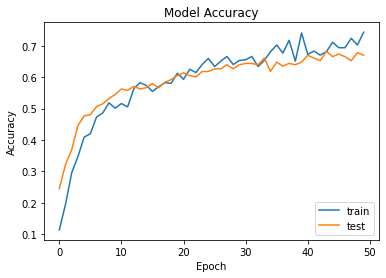

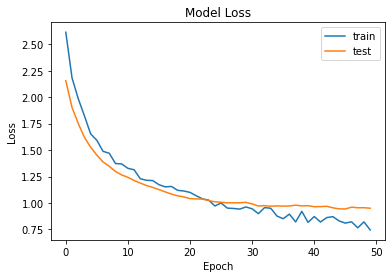

In [84]:
#recreate model, retrain and plot accuracies and losses
batch_size = 4
model = model_create(num_neurons, hidden_activation, num_genres, output_activation)
histories['2e'] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, batch_size, callbacks)

#plot
plt.plot(histories['2e'].history['accuracy'])
plt.plot(histories['2e'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'lower right' )
plt.savefig('./output_1a/2e_acc.png')
plt.show()
plt.plot(histories['2e'].history['loss'])
plt.plot(histories['2e'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.savefig('./output_1a/2e_loss.png')
plt.show()

## Q3

Find the optimal number of hidden neurons for the 2-layer network (i.e., one hidden 
layer) designed in Question 1 and 2.

a) Plot the cross-validation accuracies against training epochs for different
numbers of hidden-layer neurons. Limit the search space of the number of 
neurons to {8, 16, 32, 64}. 
Continue using 3-fold cross validation on training dataset.

We will still use batch size 4.

In [86]:
num_of_neurons = [8,16,32,64]

for num_neurons in num_of_neurons:
    for i, (train_fold_i, test_fold_i) in enumerate(k_fold.split(X_train)):
        X_train_fold = X_train[train_fold_i]
        X_test_fold = X_train[test_fold_i]
        Y_train_fold = Y_train[train_fold_i]
        Y_test_fold = Y_train[test_fold_i]
               
        model = model_create(num_neurons, hidden_activation, num_genres,
                             output_activation)
            
        model_name = "neurons_" + str(num_neurons) + "_fold_" + str(i+1)
               
        histories[model_name] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, batch_size, None)

neurons_8_fold_1


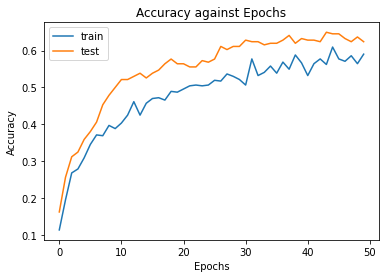

neurons_8_fold_2


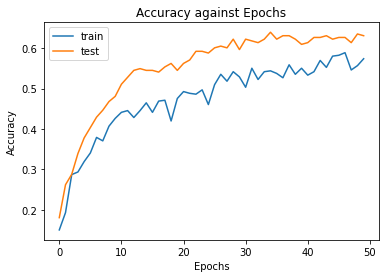

neurons_8_fold_3


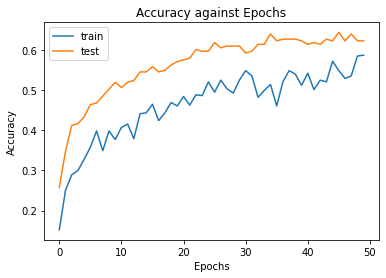

neurons_16_fold_1


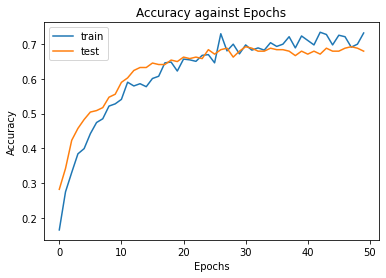

neurons_16_fold_2


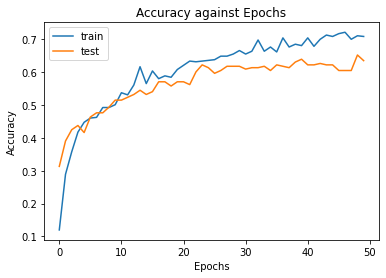

neurons_16_fold_3


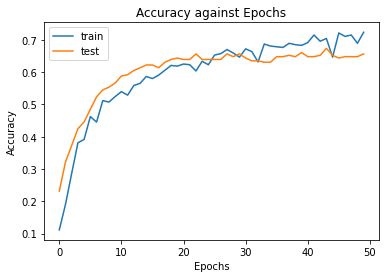

neurons_32_fold_1


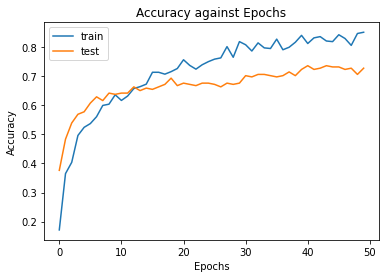

neurons_32_fold_2


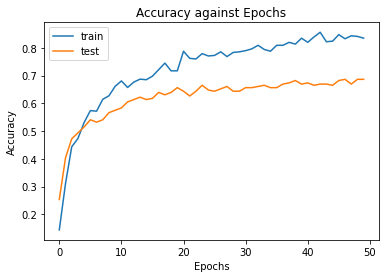

neurons_32_fold_3


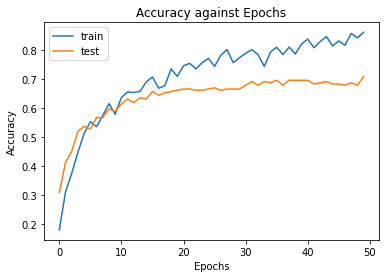

neurons_64_fold_1


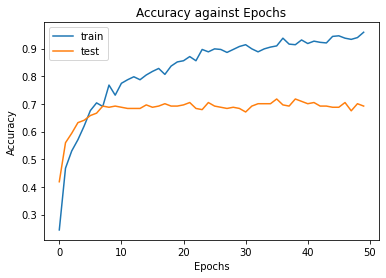

neurons_64_fold_2


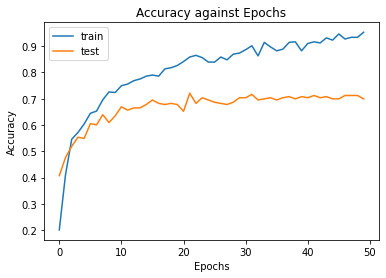

neurons_64_fold_3


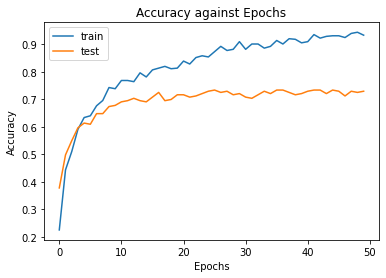

In [88]:
#plot model accuracy
for num_neurons in num_of_neurons:
    for i in range(3):
        model_name = "neurons_" + str(num_neurons) + "_fold_" + str(i+1)
        print(model_name)
        plt.plot(histories[model_name].history['accuracy'])
        plt.plot(histories[model_name].history['val_accuracy'])
        plt.title('Accuracy against Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train','test'])
        plt.savefig('./output_1a/3a_'+ model_name + '_accuracy.png')
        plt.show()

b) Select the optimal number of neurons for the hidden layer. State the 
rationale for your selection.

We generate the average accuracy and loss to find out the optimal number of neurons.

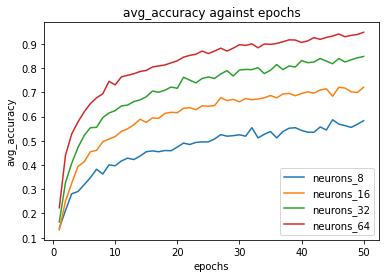

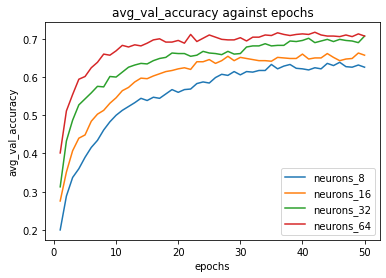

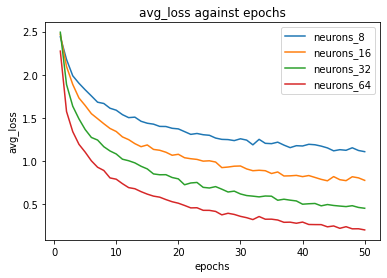

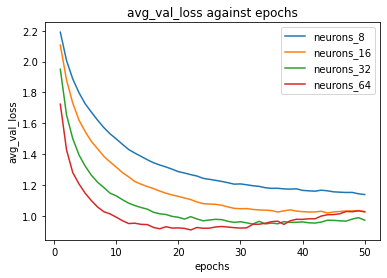

In [90]:
avg_accuracy = []
avg_val_accuracy = []
avg_loss = []
avg_val_loss = []

for num_neurons in num_of_neurons:
    neuron_accuracy = []
    neuron_val_accuracy = []
    neuron_loss = []
    neuron_val_loss = []
    for i in range(3):
        history = histories['neurons_' + str(num_neurons) + '_fold_' + str(i+1)]

        neuron_accuracy.append(np.array(history.history['accuracy']))
        neuron_val_accuracy.append(np.array(history.history['val_accuracy']))
        neuron_loss.append(np.array(history.history['loss']))
        neuron_val_loss.append(np.array(history.history['val_loss']))
        
    avg_accuracy.append(np.mean(neuron_accuracy, axis=0))
    avg_val_accuracy.append(np.mean(neuron_val_accuracy, axis=0))
    avg_loss.append(np.mean(neuron_loss, axis=0))
    avg_val_loss.append(np.mean(neuron_val_loss, axis=0))
    
#plotting it out
performance_metrics = [avg_accuracy, avg_val_accuracy,avg_loss, avg_val_loss]
performance_metrics_name = ['avg_accuracy', 'avg_val_accuracy','avg_loss', 'avg_val_loss']

for i, performance_metric in enumerate(performance_metrics):
    name = performance_metrics_name[i]
    
    for j in range(len(num_of_neurons)):
        plt.plot(np.arange(1, num_epochs+1), performance_metric[j], label='neurons_'+ str(num_of_neurons[j]))
        plt.title(name + " against epochs")
        plt.ylabel(name)
        plt.xlabel("epochs")
        plt.legend()
    plt.savefig('./output_1a/3b_'+ name + ' against epochs.png')
    plt.show()

We can observe that as the number of neurons increase, the performance is generally better (except for the average val loss for 64 neurons). Taking that into account, we set the optimal number of neurons to be 32.

c) Plot the train and test accuracies against training epochs with the optimal 
number of neurons.

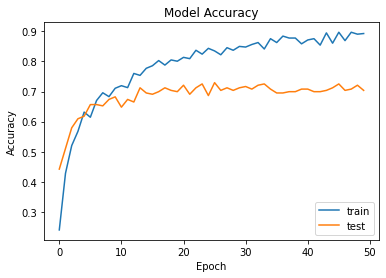

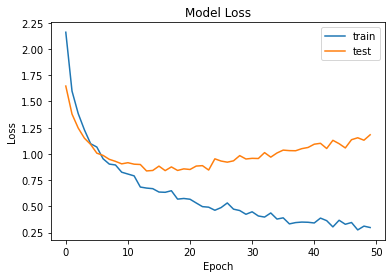

In [91]:
#recreate model, retrain and plot accuracies and losses
num_neurons = 32
model = model_create(num_neurons, hidden_activation, num_genres, output_activation)
histories['3c'] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, batch_size, callbacks)

#plot
plt.plot(histories['3c'].history['accuracy'])
plt.plot(histories['3c'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'lower right' )
plt.savefig('./output_1a/3c_acc.png')
plt.show()
plt.plot(histories['3c'].history['loss'])
plt.plot(histories['3c'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.savefig('./output_1a/3c_loss.png')
plt.show()

d) What other parameters could possibly be tuned?

The number of epochs could be tuned. Usually, the number of epochs are set to ranges such as 1000, 1500, etc. 50 is relatively low, which might hinder us from definite observations.

## Q4
After you are done with the 2-layer network, design a 3-layer network with two hiddenlayers with ReLU activation, each consisting of the optimal number of neurons you 
obtained in Question 3, (apply a dropout with a probability of 0.3 for each hidden layer), 
and train it with a batch size of 1.

In [92]:
#create a new model for 3 layer network
def model_create_3layer(num_neurons, hidden_activation, num_genres, 
                 output_activation):
    model = keras.Sequential()
    #hidden layer
    model.add(keras.layers.Dense(num_neurons, activation = hidden_activation))
    #dropout
    model.add(keras.layers.Dropout(0.3))
    #hidden layer
    model.add(keras.layers.Dense(num_neurons, activation = hidden_activation))
    #dropout
    model.add(keras.layers.Dropout(0.3))
    #output layer
    model.add(keras.layers.Dense(num_genres, activation = output_activation))

    #compile and fit
    model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                  optimizer = 'adam',
                  metrics =  ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=False)])

    return model

a) Plot the train and test accuracy of the 3-layer network against training 
epochs.

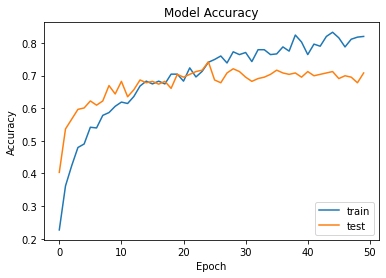

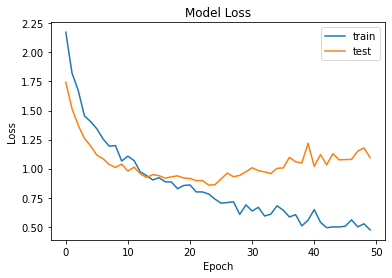

In [96]:
model = model_create_3layer(num_neurons, hidden_activation, num_genres, output_activation)
histories['4a'] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, batch_size, callbacks)

#plot
plt.plot(histories['4a'].history['accuracy'])
plt.plot(histories['4a'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'lower right' )
plt.savefig('./output_1a/4a_acc.png')
plt.show()
plt.plot(histories['4a'].history['loss'])
plt.plot(histories['4a'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.savefig('./output_1a/4a_loss.png')
plt.show()

b) Compare and comment on the performances of the optimal 2-layer network 
from your hyperparameter tuning in Question 2 and 3 and the 3-layer

To compare, we plot them on the same graph.

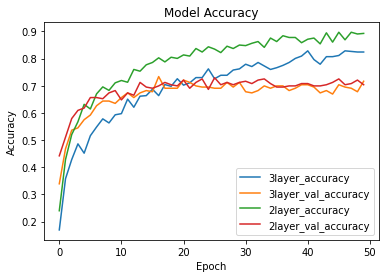

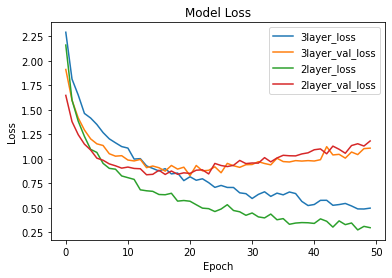

In [95]:
plt.plot(histories['4a'].history['accuracy'], label='3layer_accuracy')
plt.plot(histories['4a'].history['val_accuracy'], label='3layer_val_accuracy')
plt.plot(histories['3c'].history['accuracy'], label='2layer_accuracy')
plt.plot(histories['3c'].history['val_accuracy'], label='2layer_val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['3layer_accuracy','3layer_val_accuracy', '2layer_accuracy', '2layer_val_accuracy'], loc= 'lower right' )
plt.savefig('./output_1a/4b_acc.png')
plt.show()
plt.plot(histories['4a'].history['loss'], label='3layer_loss')
plt.plot(histories['4a'].history['val_loss'], label='3layer_val_loss')
plt.plot(histories['3c'].history['loss'], label='2layer_loss')
plt.plot(histories['3c'].history['val_loss'], label='2layer_val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['3layer_loss','3layer_val_loss','2layer_loss','2layer_val_loss'], loc= 'upper right')
plt.savefig('./output_1a/4b_loss.png')
plt.show()

For the accuracy, the 2 layer model is slightly better for the train accuracy. For the loss, the 3 layer model is better (lesser loss). Increased numbers of layers should bring about better performance, but in this case it might be due to the presence of overfitting.

## Q5
We are going to dissect the purpose of dropout in the model.

a) Why do we add dropouts? Investigate the purpose of dropouts by removing 
dropouts from your original 2-layer network (before changing the batch size 
and number of neurons). Plot accuracies on training and test data with neural 
network without dropout. Plot as well the losses on training and test data with 
neural network without dropout.

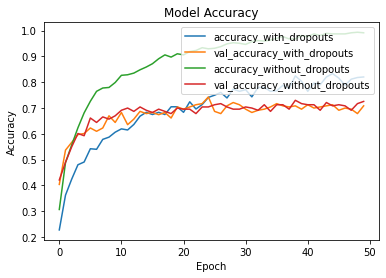

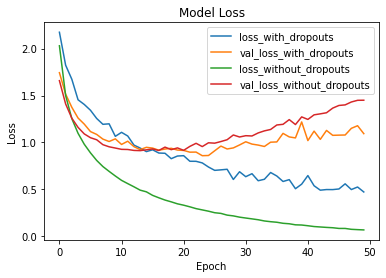

In [98]:
#create a new model for without dropouts, with batch size 1 and 16 neurons
def model_create_dropout(num_neurons, hidden_activation, num_genres, 
                 output_activation):
    model = keras.Sequential()
    #hidden layer
    model.add(keras.layers.Dense(num_neurons, activation = hidden_activation))
    #output layer
    model.add(keras.layers.Dense(num_genres, activation = output_activation))

    #compile and fit
    model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                  optimizer = 'adam',
                  metrics =  ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=False)])

    return model

model = model_create_dropout(16, hidden_activation, num_genres, output_activation)
histories['5a'] = model_fit(X_train_fold, Y_train_fold, 
                                          X_test_fold, Y_test_fold, model,
                                         num_epochs, 1, callbacks)

#plot
plt.plot(histories['4a'].history['accuracy'])
plt.plot(histories['4a'].history['val_accuracy'])
plt.plot(histories['5a'].history['accuracy'])
plt.plot(histories['5a'].history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy_with_dropouts','val_accuracy_with_dropouts','accuracy_without_dropouts','val_accuracy_without_dropouts'], loc= 'upper right')
plt.savefig('./output_1a/5a_acc.png')
plt.show()
plt.plot(histories['4a'].history['loss'])
plt.plot(histories['4a'].history['val_loss'])
plt.plot(histories['5a'].history['loss'])
plt.plot(histories['5a'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss_with_dropouts','val_loss_with_dropouts','loss_without_dropouts','val_loss_without_dropouts'], loc= 'upper right')
plt.savefig('./output_1a/5a_loss.png')
plt.show()

Dropouts benefit us by reducing overfitting. Before changing the batch size and number of neurons, these parameters may not be the optimal ones and may result in overfitting.

b) Explain the effect of removing dropouts.

The overfitting rate will increase, the model will become less jagged.

c) What is another approach that you could take to address overfitting in the 
model?

Early stopping is another approach to address overfitting. Early stopping stops the training early when it detects that the model performance is no longer improving.

## Conclusion
Pointers:
- We now have a classifier that predicts the genre of audio files based on features obtained from processing these audio tracks. What are some limitations of the current approach (using FFNs to model such engineered features)? 
- Out of the parameters that were tuned, which was most impactful in terms of improving the model performance and what could be some reasons for that? 
- Considering that audio tracks are originally waveforms, what are some alternative approaches to achieve the goal of genre classification? What kind of neural network architectures will be used instead?
- What other datasets and tasks can this approach of modelling waveform data be used for? What changes to the pipeline, if any, will you have to make when approaching these problems?

Answer:
- Due to the nature of it, musical genres are loosely defined. A genre of a song might be debatable based on different opinions and is hence not suitable to be determined and classified by FFNs. It is also difficult to extract features accuratey from these audio tracks.
- I think that changing the number of neurons was more impactful than changing the batch size. This could be because having more neurons mean that there are more samples for computation.